<a href="https://colab.research.google.com/github/quintola/Analise_dados_pos_graducao/blob/main/Trabalho_Orientado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABALHO ORIENTADO - MACHINE LEARNING**

## INFORMAÇÕES DO TRABALHO

PROFESSOR: HUGO DE PAULA

ALUNOS: ANDRE TOLENTINO, DIEGO SOUZA, MARCOS JUNQUEIRA, PAULO EDUARDO

___

LINK DOS DADOS:
https://www.kaggle.com/adaoduque/campeonato-brasileiro-de-futebol

RESUMO DOS DADOS:

ARQUIVO: campeonato-brasileiro-estatisticas-full.csv

1. **ID:** ID da partida
2. **MANDANTE:** Sendo 0 para os visitantes e 1 para os mandantes.
3. **CHUTES:** Total de finalizações na partida.
4. **CHUTES A GOL:** Finalizações certas ao gol adversário.
5. **POSSE DE BOLA:** Percentual de posse de bola na partida.
6. **PASSES:** Quantidade de passes dado pela equipe.
7. **PRECISÃO DE PASSE:** Percentual de passes completados.
8. **FALTAS:** Quantidade de faltas cometidas pela equipe.
9. **CARTÕES AMARELOS:** Número de cartões amarelos recebidos pela equipe.
10. **CARTÕES VERMELHOS:** Númerod e cartões vermelhos recebidos pela equipe.
11. **IMPEDIMENTOS:** Quantidade de impedimentos pela equipe na partida.
12. **ESCANTEIOS:** Quandidade de escanteios que a equipe teve na partida.

ARQUIVO: campeonato-brasileiro-full.csv

1. **ID:** ID da partida
2. **RODADA:** Rodada em que aconteceu a partida.
3. **DATA:** Quando ocorreu a partida.
4. **HORÁRIO:** Horário de realização do jogo.
5. **DIA:** Dia de realização do jogo.
6. **MANDANTE:** Equipe mandante da partida.
7. **VISITANTE:** Equipe visitante da partida.
8. **VENCEDOR:** Equipe vencedora da partida. Caso tenha "-", é considerado empate.
9. **ARENA:** Estádio onde foi realizada a partida.
10. **MANDANTE PLACAR:** Placar do mandante da partida.
11. **VISITANTE PLACAR:** Placar do visitante da partida.
12. **ESTADO MANDANTE:** Estado do mandante da partida.
13. **ESTADO VISITANTE:** Estado do visitante da partida.
14. **ESTADO VENCEDOR:** Estado do vencedor da partida. Caso tenha "-", é considerado empate.


##IMPORTAÇÃO DOS PACOTES NECESSÁRIOS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_extraction import DictVectorizer
from IPython.display import Image
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
import pydotplus
np.set_printoptions(precision=2)

## LEITURA DA BASE QUE SERÁ TRABALHADA

In [ ]:
from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv('campeonato-brasileiro-estatisticas-full.csv', sep=',')
df5 = pd.read_csv('campeonato-brasileiro-full.csv', sep=',')

Saving campeonato-brasileiro-estatisticas-full.csv to campeonato-brasileiro-estatisticas-full.csv
Saving campeonato-brasileiro-full.csv to campeonato-brasileiro-full.csv


In [ ]:
df5.head()

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-


In [ ]:
# Remoção de linhas duplicadas

df1.drop_duplicates(inplace=True)
df5.drop_duplicates(inplace=True)

In [ ]:
df2 = df1[df1['Mandante']==0]
df3 = df1[df1['Mandante']==1]

df3 = df3.rename(columns={'Chutes': 'Chute_M','Chutes a gol': 'Chute_M_Gol','Posse de bola': 'Posse_M', 'Precisão de passe': 'Precis_M','Faltas': 'Faltas_M', 'Cartões amarelos': 'C.A._M', 'Cartões vermelhos':'C.V._M', 'Impedimentos': 'Imped_M', 'Escanteios': 'Escant_M','Passes': 'Passes_M' })
df3.drop(['Mandante'], axis=1, inplace=True)
df2 = df2.rename(columns={'Chutes': 'Chute_V','Chutes a gol': 'Chute_V_Gol','Posse de bola': 'Posse_V', 'Precisão de passe': 'Precis_V','Faltas': 'Faltas_V', 'Cartões amarelos': 'C.A._V', 'Cartões vermelhos':'C.V._V', 'Impedimentos': 'Imped_V', 'Escanteios': 'Escant_V','Passes': 'Passes_V' })
df2.drop(['Mandante'], axis=1, inplace=True)

df4 = pd.merge(df3,df2, how="inner", on=['ID'])

df4.head()

,ID,Chute_M,Chute_M_Gol,Posse_M,Passes_M,Precis_M,Faltas_M,C.A._M,C.V._M,Imped_M,Escant_M,Chute_V,Chute_V_Gol,Posse_V,Passes_V,Precis_V,Faltas_V,C.A._V,C.V._V,Imped_V,Escant_V
0,6041,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
1,6040,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0,10.0,0.0,50%,426.0,NaN,14.0,4.0,0.0,4.0,2.0
2,6042,26.0,11.0,74%,702.0,NaN,9.0,2.0,0.0,1.0,5.0,3.0,0.0,26%,250.0,NaN,14.0,0.0,1.0,1.0,3.0
3,6044,11.0,0.0,45%,401.0,NaN,17.0,3.0,0.0,2.0,5.0,17.0,0.0,55%,473.0,NaN,21.0,4.0,1.0,0.0,10.0
4,6046,10.0,0.0,39%,335.0,NaN,17.0,1.0,0.0,1.0,2.0,17.0,0.0,61%,502.0,NaN,17.0,2.0,0.0,1.0,11.0


In [ ]:
# Venceu, Perdeu ou Empatou

df5["Resultado"] = df5["Mandante Placar"] - df5["Visitante Placar"]

def resultado(valor):
    if valor < 0:
        return "Visitante"
    elif valor > 0:
        return "Mandante"
    else:
        return "Empate"

df5["Result"] = df5["Resultado"].apply(lambda linha:resultado(linha))

In [ ]:
df5.head()

,ID,Rodada,Data,Horário,Dia,Mandante,Visitante,Vencedor,Arena,Mandante Placar,Visitante Placar,Estado Mandante,Estado Visitante,Estado Vencedor,Resultado,Result
0,1,1,2000-07-29,16h00,Sábado,Fluminense,Bahia,Fluminense,Maracanã,2,0,RJ,BA,RJ,2,Mandante
1,2,1,2000-07-29,16h00,Sábado,Vasco,Sport,Sport,São Januário,0,2,RJ,PE,PE,-2,Visitante
2,3,1,2000-07-29,16h00,Sábado,Vitória,Palmeiras,Vitória,Barradão,4,1,ES,SP,ES,3,Mandante
3,4,1,2000-07-30,17h00,Domingo,Botafogo-RJ,Atlético-MG,-,Caio Martins,0,0,RJ,MG,-,0,Empate
4,5,1,2000-07-30,18h30,Domingo,Juventude,Flamengo,-,Alfredo Jaconi,1,1,RS,RJ,-,0,Empate


In [ ]:
# Merge Data

Statistics = df5[["ID", "Result", "Rodada"]].merge(df4, how = "inner")

In [ ]:
Statistics.head()

,ID,Result,Rodada,Chute_M,Chute_M_Gol,Posse_M,Passes_M,Precis_M,Faltas_M,C.A._M,C.V._M,Imped_M,Escant_M,Chute_V,Chute_V_Gol,Posse_V,Passes_V,Precis_V,Faltas_V,C.A._V,C.V._V,Imped_V,Escant_V
0,6040,Empate,1,17.0,0.0,50%,406.0,NaN,20.0,2.0,0.0,2.0,11.0,10.0,0.0,50%,426.0,NaN,14.0,4.0,0.0,4.0,2.0
1,6041,Mandante,1,13.0,0.0,45%,326.0,NaN,20.0,2.0,0.0,3.0,3.0,16.0,0.0,55%,388.0,NaN,21.0,2.0,0.0,0.0,5.0
2,6042,Mandante,1,26.0,11.0,74%,702.0,NaN,9.0,2.0,0.0,1.0,5.0,3.0,0.0,26%,250.0,NaN,14.0,0.0,1.0,1.0,3.0
3,6043,Empate,1,11.0,0.0,62%,439.0,NaN,16.0,3.0,0.0,0.0,4.0,5.0,0.0,38%,279.0,NaN,27.0,5.0,0.0,2.0,2.0
4,6044,Empate,1,11.0,0.0,45%,401.0,NaN,17.0,3.0,0.0,2.0,5.0,17.0,0.0,55%,473.0,NaN,21.0,4.0,1.0,0.0,10.0


In [ ]:
Statistics.shape

(2279, 23)

## EXPLORAÇÃO DA BASE DE DADOS

### **Característica das Features**

In [ ]:
Statistics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 0 to 2278
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           2279 non-null   int64  
 1   Result       2279 non-null   object 
 2   Rodada       2279 non-null   object 
 3   Chute_M      2254 non-null   float64
 4   Chute_M_Gol  2254 non-null   float64
 5   Posse_M      2254 non-null   object 
 6   Passes_M     2254 non-null   float64
 7   Precis_M     1116 non-null   object 
 8   Faltas_M     2254 non-null   float64
 9   C.A._M       2254 non-null   float64
 10  C.V._M       2254 non-null   float64
 11  Imped_M      2254 non-null   float64
 12  Escant_M     2254 non-null   float64
 13  Chute_V      2254 non-null   float64
 14  Chute_V_Gol  2254 non-null   float64
 15  Posse_V      2254 non-null   object 
 16  Passes_V     2254 non-null   float64
 17  Precis_V     1116 non-null   object 
 18  Faltas_V     2254 non-null   float64
 19  C.A._V

In [ ]:
# Transformando dado categórico em discreto

dic = {"Mandante" : 0, "Empate": 1, "Visitante": 2}

Statistics["Result"] = Statistics["Result"].map(dic)

Statistics["Rodada"] = Statistics["Rodada"].astype("float")

In [ ]:
#TRANSFORMANDO O INTERVALO DE STRING PARA FLOAT
Statistics['Precis_M'] = Statistics['Precis_M'].str.rstrip('%').astype('float') / 100
Statistics['Posse_M'] = Statistics['Posse_M'].str.rstrip('%').astype('float') / 100

#TRANSFORMANDO O INTERVALO DE STRING PARA FLOAT
Statistics['Precis_V'] = Statistics['Precis_V'].str.rstrip('%').astype('float') / 100
Statistics['Posse_V'] = Statistics['Posse_V'].str.rstrip('%').astype('float') / 100

In [ ]:
Statistics.drop(columns=["Precis_M", "Precis_V"], inplace=True)
Statistics.dropna(inplace=True)

### **Correlações**

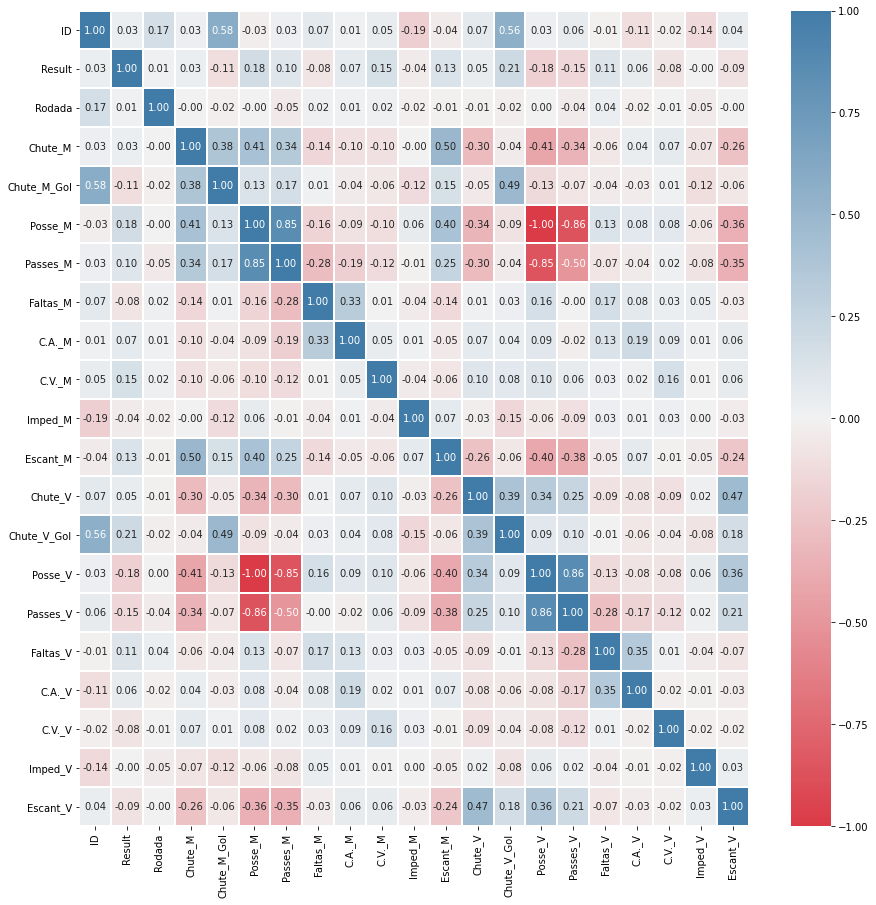

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)

sns.heatmap(Statistics.corr(), center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")


- Correlação entre  Posse_V e Posse_M

Como a posse de bole do time visitante é igual a 100% a posse de bola do time mandante, a correlação entre essas duas variáveis são 1. Ou seja, as duas estão trazendo a mesma informação, gerando duplicidade.



### **Variável Dependente** - Resultados Partidas

Text(0.5, 0, 'Mantante | Empate | Derrota')

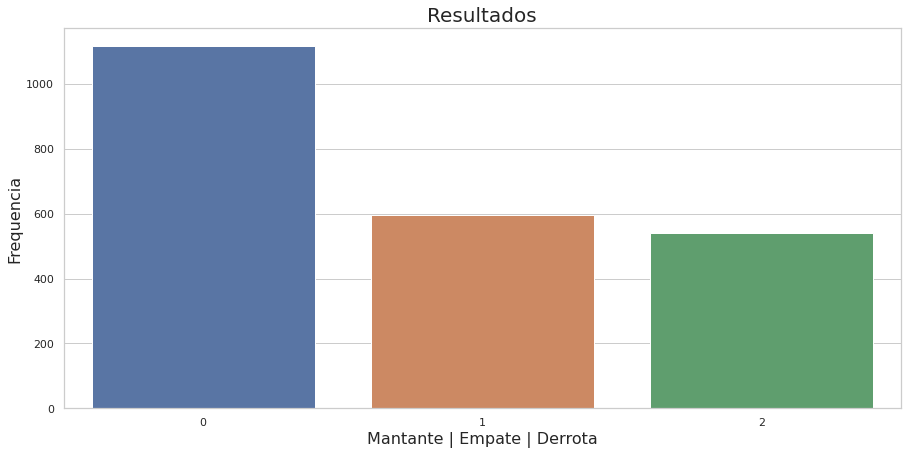

In [ ]:
import seaborn as sns
from numpy import median, count_nonzero

fig = plt.figure(figsize=(15,7))

sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="Result", y="ID", data=Statistics, estimator=count_nonzero)

ax.set_title("Resultados", fontsize = 20)
ax.set_ylabel("Frequencia", fontsize = 16)
ax.set_xlabel("Mantante | Empate | Derrota", fontsize = 16)

<p> É possível perceber que dos 2.279 jogos analisados, a grande maioria pe compostas por Vitória do mandante. Ou seja, nossos dados estão com um desbalanceamento para a variável resposta. </p>

### **Variável Explicativa** - Chutes a Gol

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Número de Chutes')

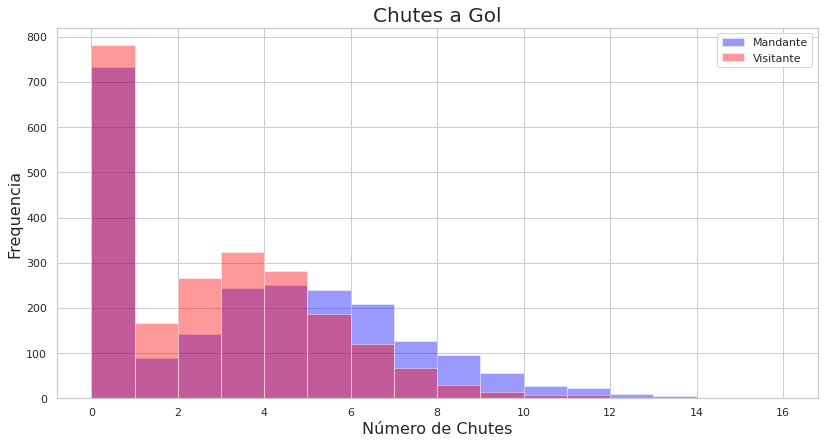

In [ ]:
fig = plt.figure(figsize=(30,15))

g0 = fig.add_subplot(2, 2, 1)
sns.distplot(Statistics["Chute_M_Gol"], color = 'blue', label = 'Mandante', norm_hist=False, kde=False, bins = 16)
sns.distplot(Statistics["Chute_V_Gol"], color = 'red', label = 'Visitante',  norm_hist=False, kde=False, bins = 12)
plt.legend()
g0.set_title("Chutes a Gol", fontsize = 20)
g0.set_ylabel("Frequencia", fontsize = 16)
g0.set_xlabel("Número de Chutes", fontsize = 16)


É possível observar que o gráfico de dispersão do Mandante tem característica de ser mais alongado. Isso vai em ao encontro com a sabedoria popular, onde o time mandante é responsável por atacar e o visitante de tentar o contra ataque.

### **Variável Explicativa** - Cartões Vermelhos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Número de Cartões')

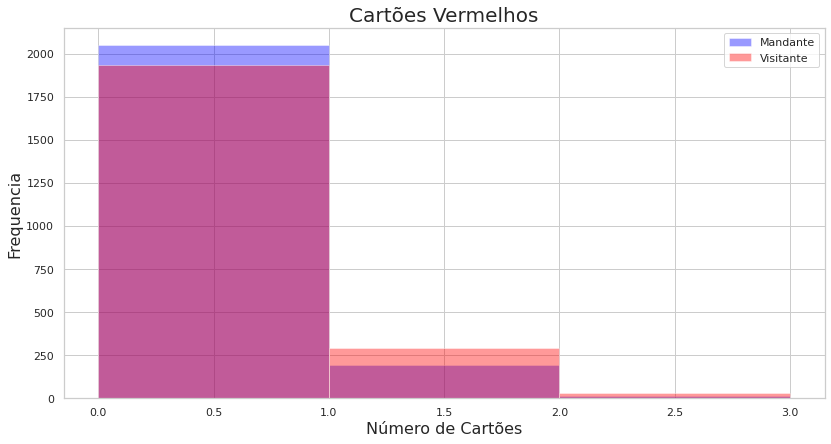

In [ ]:
fig = plt.figure(figsize=(30,15))

g0 = fig.add_subplot(2, 2, 1)
sns.distplot(Statistics["C.V._M"], color = 'blue', label = 'Mandante', norm_hist=False, kde=False, bins = 3)
sns.distplot(Statistics["C.V._V"], color = 'red', label = 'Visitante',  norm_hist=False, kde=False, bins = 3)
plt.legend()
g0.set_title("Cartões Vermelhos", fontsize = 20)
g0.set_ylabel("Frequencia", fontsize = 16)
g0.set_xlabel("Número de Cartões", fontsize = 16)

Embora seja pequena a diferença entre cartões vermelhosm existe uma maior concentração de vermelhos para times visitantes. Isso pode ser um indício  os juízes tendem a serem mais brandos com os times que possuem o mando de campo.

### **Variável Explicativa** - Rodada

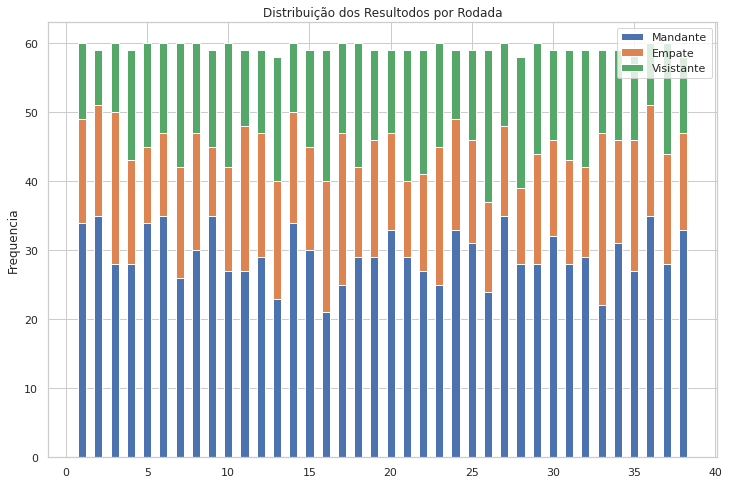

In [ ]:
width = 0.5

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(Statistics["Rodada"].unique(), Statistics[Statistics["Result"]==0].groupby(by="Rodada").count()["Result"], width, label='Mandante')
ax.bar(Statistics["Rodada"].unique(), Statistics[Statistics["Result"]==1].groupby(by="Rodada").count()["Result"], width, bottom=Statistics[Statistics["Result"]==0].groupby(by="Rodada").count()["Result"], label='Empate')
ax.bar(Statistics["Rodada"].unique(), Statistics[Statistics["Result"]==2].groupby(by="Rodada").count()["Result"], width, bottom=Statistics[Statistics["Result"]!=2].groupby(by="Rodada").count()["Result"], label='Visistante')


ax.set_ylabel('Frequencia')
ax.set_title('Distribuição dos Resultodos por Rodada')
ax.legend()

plt.show()

Tentativa de identificar algum perfil durante as rodadas. Talvez no final do campeonato, onde os times estão mais preocupados em garantir um ponto do que tentar ganhar 3, poderia se ver uma maior frequência de empates nas rodadas finais. No entanto não é possivel identificar visualmente nenhum tipo de comportamento padrão.

## CONSTRUÇÃO DOS MODELOS

In [ ]:

X = Statistics.drop(columns=["ID", "Posse_M", "Result"])

y = Statistics["Result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

### **Dummy Classifier**

Criação do modelo Base Line.

Ele dara o ponto de partida, onde teremos noção de quanto de fato melhoramos a previsão em relação a um modelo que apenas chuta os resultados com uma estratégia simples.

In [ ]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)
acuracia = dummy.score(X_test, y_test) * 100

print("A acurácia do dummy foi %.2f%%" % acuracia)

A acurácia do dummy foi 33.19%


### **Árvore de Decisão**

In [ ]:
# Definir seed padrão

SEED = 42367
np.random.seed(seed=SEED)

class_names = ["Mandante", "Empate", "Visistante"]

model = tree.DecisionTreeClassifier(criterion='entropy')

hiperparametros = {
    "criterion": ["gini", "entropy"],
    "max_depth" : [2,3,4,5,10],
    "min_samples_leaf" : [1,2,4,6,8,10],
    "min_samples_split" : [2,3,4,5],
}

busca = RandomizedSearchCV(model,
                    hiperparametros,
                    cv = StratifiedKFold(n_splits = 3, shuffle=True),
                    n_iter=50,
                    verbose=1,
                    return_train_score=True)

busca.fit(X_train, y_train)

model = busca.best_estimator_
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print("Classificador Árvore de Decisão:\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(model.score(X_train, y_train)))
print("--------------------------------------")

print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Classificador Árvore de Decisão:

--------------------------------------
Acurácia da base de treinamento: 0.59
--------------------------------------
              precision    recall  f1-score   support

    Mandante       0.65      0.75      0.69       126
      Empate       0.33      0.22      0.26        63
  Visistante       0.34      0.35      0.35        37

    accuracy                           0.54       226
   macro avg       0.44      0.44      0.43       226
weighted avg       0.51      0.54      0.52       226

            Mandante(prev)  Empate(prev)  Visistante(prev)
Mandante                94            19                13
Empate                  37            14                12
Visistante              14            10                13


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.5s finished


In [ ]:
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

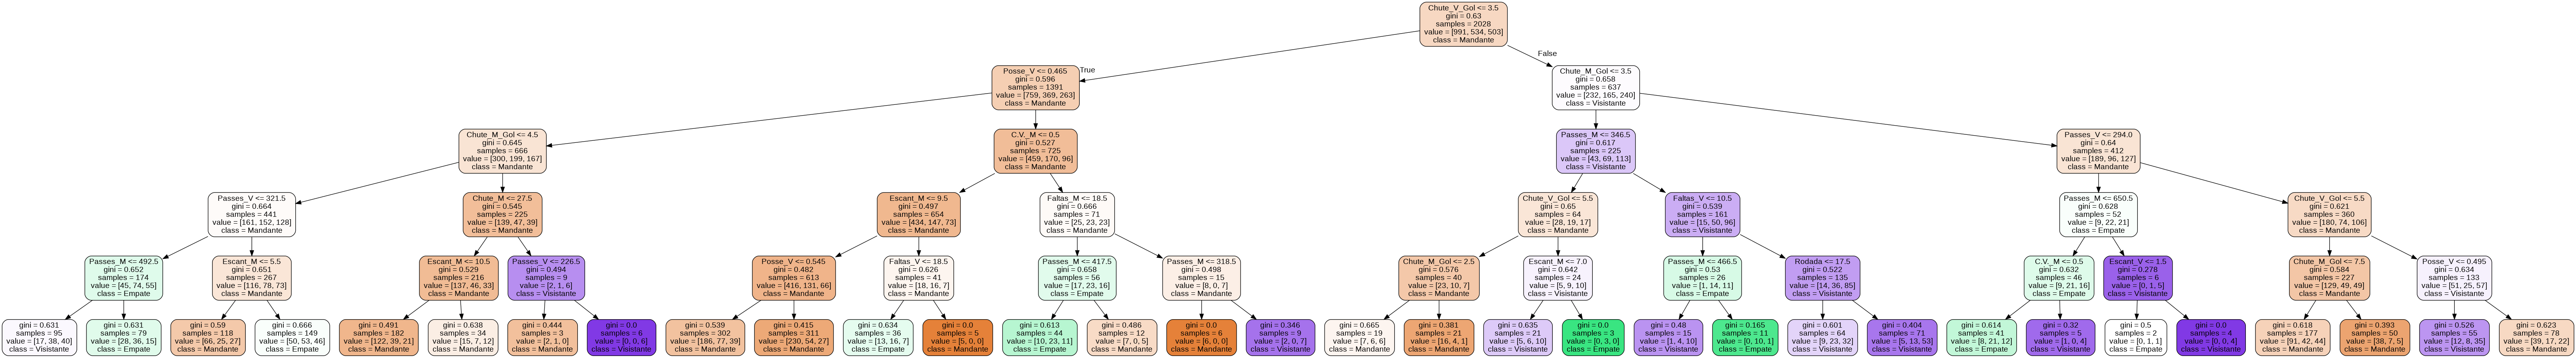

In [ ]:
features = X.columns
dot_data = tree.export_graphviz(model, out_file=None,
                                rounded =True,
                                filled=True,
                                class_names=class_names,
                                feature_names = features)

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

### **Adaboost**

In [ ]:
# Definido semente Padrão
SEED = 42
np.random.seed(SEED)

ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), algorithm="SAMME", n_estimators=20)

hiperparametros = {
    "base_estimator__max_depth" : [2,4,5,10],
    "base_estimator__min_samples_leaf" : [2,4,6,8],
    "base_estimator__min_samples_split" : [2,3,4],
    "base_estimator__criterion" : ["gini", "entropy"],
    "n_estimators" : [5,6,7,8,10]
}

busca = RandomizedSearchCV(ada,
                    hiperparametros,
                    cv = StratifiedKFold(n_splits = 3, shuffle=True),
                    scoring="accuracy",
                    n_iter=200,
                    verbose=1,
                    return_train_score=True)

busca.fit(X_train, y_train)

ada = busca.best_estimator_

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("Acurácia da base de treinamento: {:.2f}".format(ada.score(X_train, y_train)))
print("--------------------------------------------------------------------")
print("Acurácia da base de teste: {:.2f}".format(ada.score(X_test, y_test)))
print("--------------------------------------------------------------------")
print(classification_report(y_test, y_pred, target_names=class_names))

cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_table = pd.DataFrame(data=cnf_matrix, index=class_names, columns=[x + "(prev)" for x in class_names])
print(cnf_table)

Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Acurácia da base de treinamento: 0.55
--------------------------------------------------------------------
Acurácia da base de teste: 0.57
--------------------------------------------------------------------
              precision    recall  f1-score   support

    Mandante       0.63      0.84      0.72       126
      Empate       0.67      0.06      0.12        63
  Visistante       0.34      0.49      0.40        37

    accuracy                           0.57       226
   macro avg       0.55      0.46      0.41       226
weighted avg       0.60      0.57      0.50       226

            Mandante(prev)  Empate(prev)  Visistante(prev)
Mandante               106             1                19
Empate                  43             4                16
Visistante              18             1                18


[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:   37.0s finished


In [ ]:
ada

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=2,
                                                         min_samples_split=3,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                         